In [1]:
from PIL import Image
from math import pi, log, exp
import numpy as np

img = Image.open('darwin.png')
img.load()

print(img.size)
print(img.mode)

data = img.getdata()
print(data[1])
a = np.array(img, dtype=np.uint8).reshape(img.size[::-1])
print(a[0,1])

(838, 1024)
L
3
3


In [3]:
img.size[::1]

(838, 1024)

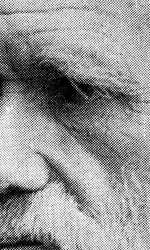

In [2]:
b = a[200:450, 300:450]
pic = Image.fromarray(b)
pic

In [3]:
def blur_py(img, r):
    w, h = img.size
    a = np.array(img.getdata(), dtype=np.uint8).reshape(h, w)
    b = np.zeros((h,w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            s = 0.
            up, bt = max(i-r,0), min(i+r+1,h)
            lf, rt = max(j-r,0), min(j+r+1,w)
            n = (bt-up)*(rt-lf)
            for y in range(up,bt):
                for x in range(lf,rt):
                    s += a[y,x]
            b[i,j] = s / n
    return Image.fromarray(b)

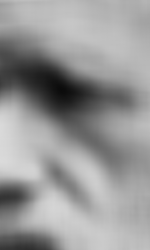

In [4]:
blur_py(pic,10)

In [12]:
def blur_np(img, r):
    w, h = img.size
    a = np.array(img.getdata(), dtype=np.uint8)\
                .reshape(h, w)
    b = np.zeros((h,w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            up, bt = max(i-r,0), min(i+r+1,h)
            lf, rt = max(j-r,0), min(j+r+1,w)
            b[i,j] = np.average(a[up:bt, lf:rt])
    return Image.fromarray(b)

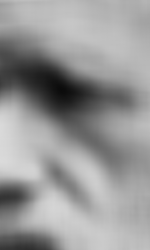

In [19]:
blur_np(pic,10)

In [8]:
def blur_npnp(img,r):
    w, h = img.size
    a = np.array(img.getdata(), dtype=np.uint8).reshape(h, w)                                                 
    n = 2*r+1
    shifted = [np.roll(np.roll(a,i//n,axis=0),i%n,axis=1) for i in range(n**2)]
    b = (np.sum(np.stack(shifted), axis=0) / n**2).astype(np.uint8)
    return Image.fromarray(b)

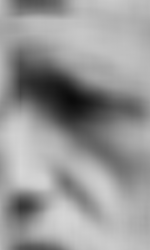

In [22]:
blur_npnp(pic,10)

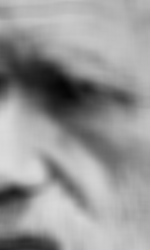

In [20]:
blur_np(pic,6)

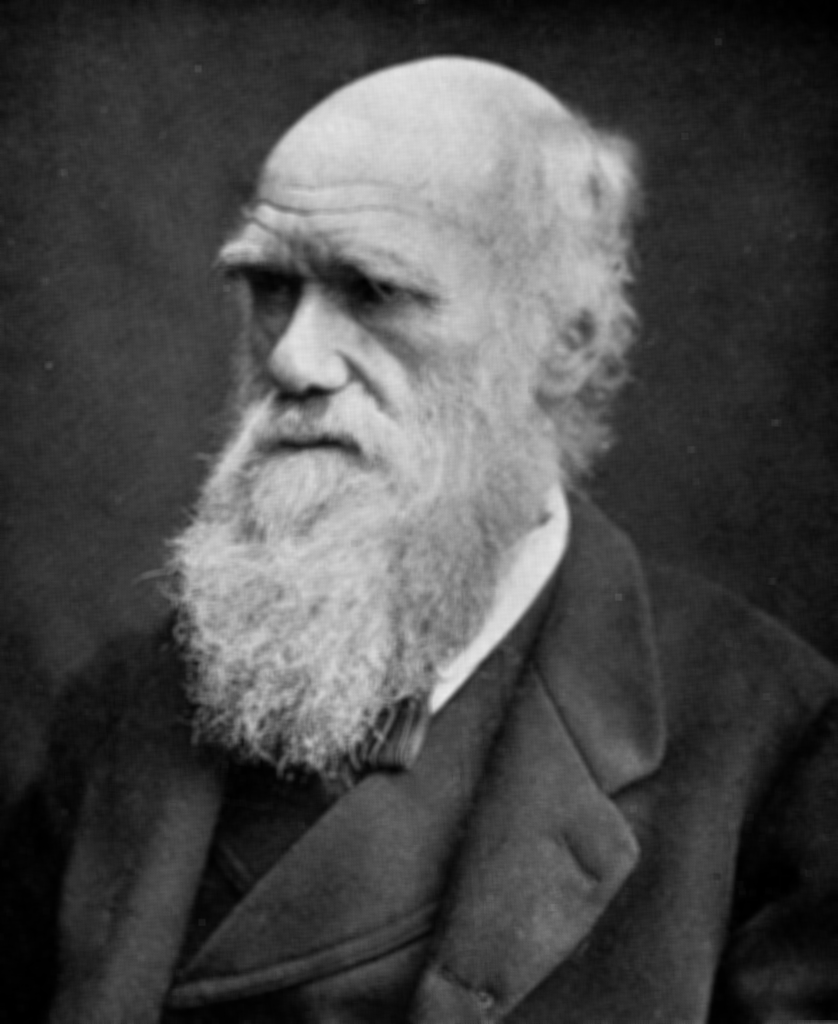

In [7]:
blur_np(Image.fromarray(a),3)

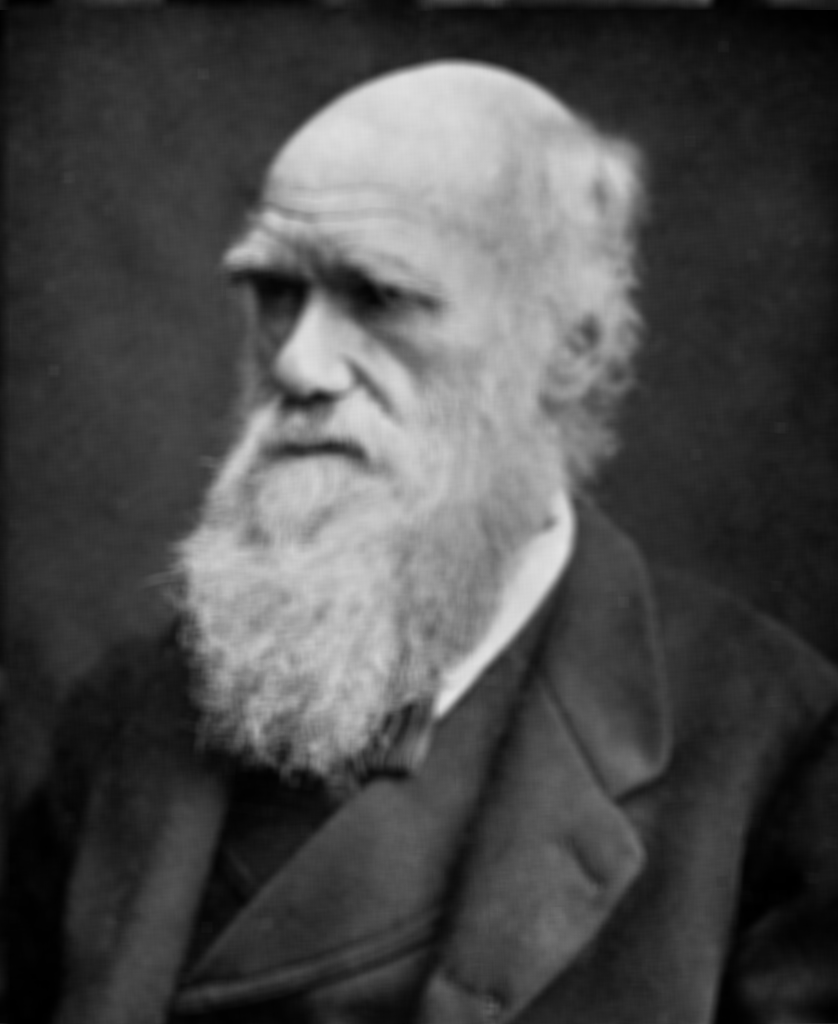

In [9]:
img2 = blur_npnp(img,5)
img2

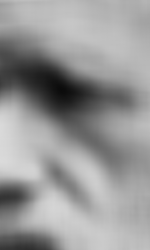

In [27]:
blur_np(pic,10)

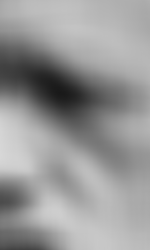

In [21]:
blur_np(pic,16)

In [36]:
img2 = blur_npnp(img,5)
img2
img2.save('darwin2.png')

In [11]:
%timeit(blur_py(pic,6))

3.28 s ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit(blur_np(pic,6))

760 ms ± 7.94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit(blur_npnp(pic,6))

33 ms ± 541 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
r = 3
dx, dy = np.meshgrid(np.arange(-r, +r+1, 1.), np.arange(-r, +r+1, 1.0))
sigma = 0.38*r
gauss_dist = np.exp( -(dx*dx+dy*dy)/(2*sigma**2) ) / (2*pi*sigma**2)
gauss_dist

array([[1.20345793e-04, 8.23890829e-04, 2.61296096e-03, 3.83902263e-03,
        2.61296096e-03, 8.23890829e-04, 1.20345793e-04],
       [8.23890829e-04, 5.64038076e-03, 1.78884073e-02, 2.62820614e-02,
        1.78884073e-02, 5.64038076e-03, 8.23890829e-04],
       [2.61296096e-03, 1.78884073e-02, 5.67328926e-02, 8.33532769e-02,
        5.67328926e-02, 1.78884073e-02, 2.61296096e-03],
       [3.83902263e-03, 2.62820614e-02, 8.33532769e-02, 1.22464561e-01,
        8.33532769e-02, 2.62820614e-02, 3.83902263e-03],
       [2.61296096e-03, 1.78884073e-02, 5.67328926e-02, 8.33532769e-02,
        5.67328926e-02, 1.78884073e-02, 2.61296096e-03],
       [8.23890829e-04, 5.64038076e-03, 1.78884073e-02, 2.62820614e-02,
        1.78884073e-02, 5.64038076e-03, 8.23890829e-04],
       [1.20345793e-04, 8.23890829e-04, 2.61296096e-03, 3.83902263e-03,
        2.61296096e-03, 8.23890829e-04, 1.20345793e-04]])

In [17]:
coeff = gauss_dist/np.sum(gauss_dist)
coeff

array([[1.20715357e-04, 8.26420872e-04, 2.62098496e-03, 3.85081168e-03,
        2.62098496e-03, 8.26420872e-04, 1.20715357e-04],
       [8.26420872e-04, 5.65770151e-03, 1.79433399e-02, 2.63627696e-02,
        1.79433399e-02, 5.65770151e-03, 8.26420872e-04],
       [2.62098496e-03, 1.79433399e-02, 5.69071107e-02, 8.36092421e-02,
        5.69071107e-02, 1.79433399e-02, 2.62098496e-03],
       [3.85081168e-03, 2.63627696e-02, 8.36092421e-02, 1.22840631e-01,
        8.36092421e-02, 2.63627696e-02, 3.85081168e-03],
       [2.62098496e-03, 1.79433399e-02, 5.69071107e-02, 8.36092421e-02,
        5.69071107e-02, 1.79433399e-02, 2.62098496e-03],
       [8.26420872e-04, 5.65770151e-03, 1.79433399e-02, 2.63627696e-02,
        1.79433399e-02, 5.65770151e-03, 8.26420872e-04],
       [1.20715357e-04, 8.26420872e-04, 2.62098496e-03, 3.85081168e-03,
        2.62098496e-03, 8.26420872e-04, 1.20715357e-04]])

In [32]:
coeff[3][3]/coeff[0][0]

1017.6056615827617

In [33]:
np.sum(coeff)

1.0

In [24]:
def blur_gauss(img, r):
    w, h = img.size
    a = np.array(img.getdata(), dtype=np.uint8)\
                .reshape(h, w)
    b = np.zeros((h,w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            up, bt = max(i-r,0), min(i+r+1,h)
            lf, rt = max(j-r,0), min(j+r+1,w)
            mask = coeff[up - i + r:bt - i + r,lf - j + r:rt - j + r]
            b[i,j] = (a[up:bt, lf:rt] * mask).sum() / mask.sum() 
    return Image.fromarray(b)

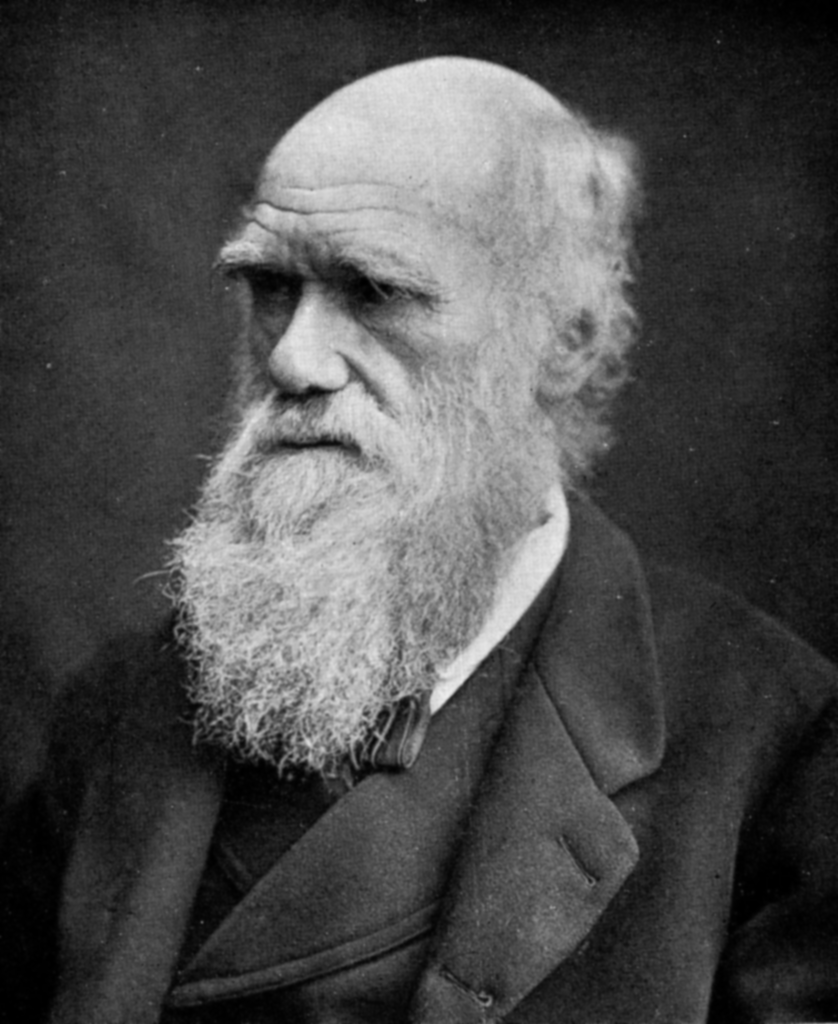

In [28]:
blur_gauss(img, 3)

In [ ]:
img2 = blur_gauss(img,3)
img2.save("drawin2.jpg")